# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre: SANTIAGO ANDRES ANGULO TORO

Identificación: 1.001.154.362

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [ ]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# df['Columna'] == valor (Crea un filtro para buscar el valor)
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Steffensen** es un algoritmo iterativo para encontrar raíces de ecuaciones no lineales de la forma:

$$
f(x) = 0.
$$

Se basa en aplicar una **aceleración cuadrática** al método de punto fijo, sin necesidad de calcular derivadas, a diferencia del método de Newton.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ cuya raíz se desea encontrar.

   - Se busca una raíz $\alpha$ tal que $f(\alpha) = 0$.

2. **Elegir una aproximación inicial** $x_0$ razonablemente cercana a la raíz.

3. **Aplicar la iteración de Steffensen**:

   Para cada iteración $n$, calcular:

   $$
   y_n = x_n + f(x_n)
   $$

   $$
   x_{n+1} = x_n - \frac{f(x_n)^2}{f(y_n) - f(x_n)}
   $$

   Asegurarse de que $f(y_n) \ne f(x_n)$ para evitar división por cero.

4. **Evaluar el criterio de convergencia**:

   - Repetir el paso 3 hasta que se cumpla
     - $|x_{n+1} - x_n| < \varepsilon$ (precisión sobre el valor de la raíz).

     donde $\varepsilon$ son tolerancias pequeñas definidas por el usuario.

5. **Resultado final**:

   - Cuando se cumple el criterio de convergencia, tomar $x_{n+1}$ como una aproximación a la raíz de $f(x) = 0$.

---


* Defina una función llamada `Steffensen` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x^2,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame llamado `df` con los datos de $x$ y $f(x)$  encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Steffensen encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -10, 10)

# Grafico semilog

plt.semilogy(N, tol)

```

In [ ]:
# Aquí va su código
def funcion(x):
  return np.cos(x) - x**2

def steffensen(f, x0,n,tolerancia):
    x = x0
    iteraciones = 0
    while True:
        y = x + f(x)
        if f(y) - f(x) == 0:
          return x, iteraciones
        x1 = x0 - (f(x)**2) / (f(y) - f(x))
        if abs(x1 - x) < tolerancia:
            return x1, iteraciones
        x = x1
        iteraciones += 1

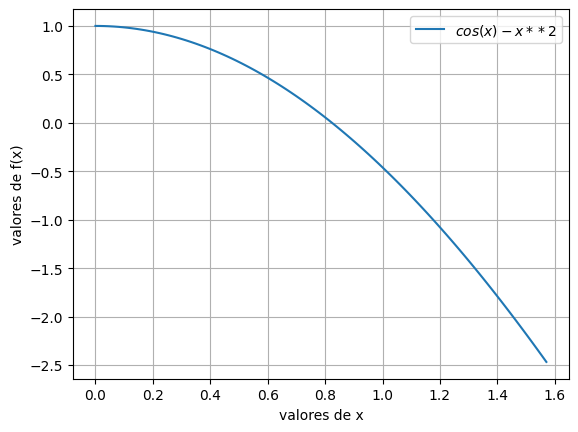

In [ ]:
fx = lambda x: np.cos(x)-x**2
valoresdex = np.linspace(0, np.pi/2,100)
valoresdey = fx(valoresdex)

plt.plot(valoresdex,valoresdey,label='$cos(x)-x**2$')
plt.xlabel('valores de x')
plt.ylabel('valores de f(x)')
plt.grid()
plt.legend()
plt.show()

In [ ]:
df = pd.DataFrame({'x': valoresdex, 'f(x)': valoresdey})
df_sorted = df.iloc[(df['f(x)'] - 0).abs().argsort()]

primera_aproximacion = df_sorted.iloc[0]['x']
print(f"Primera aproximación a la raíz (usando DataFrame): {primera_aproximacion}")

raizbiseccion = bisect(funcion, 0, np.pi/2)
print(f"Raíz usando el método de bisección: {raizbiseccion}")

raizsecante = newton(funcion, primera_aproximacion)
print(f"Raíz usando el método de la secante: {raizsecante}")

raizsteffensen, iteraciones = steffensen(funcion, 0.8,tolerancia=1e-3,n=100)
print(f"Raíz usando el método de Steffensen: {raizsteffensen}, Número de iteraciones: {iteraciones}")

Primera aproximación a la raíz (usando DataFrame): 0.8250647373064104
Raíz usando el método de bisección: 0.8241323123030827
Raíz usando el método de la secante: 0.8241323123025226
Raíz usando el método de Steffensen: 0.8115218531752693, Número de iteraciones: 171


Probando con tolerancia: 0.1
Probando con tolerancia: 0.027825594022071243
Probando con tolerancia: 0.007742636826811269
Probando con tolerancia: 0.002154434690031882
Probando con tolerancia: 0.0005994842503189409
Probando con tolerancia: 0.0001668100537200059
Probando con tolerancia: 4.641588833612772e-05
Probando con tolerancia: 1.2915496650148827e-05
Probando con tolerancia: 3.5938136638046257e-06
Probando con tolerancia: 1e-06


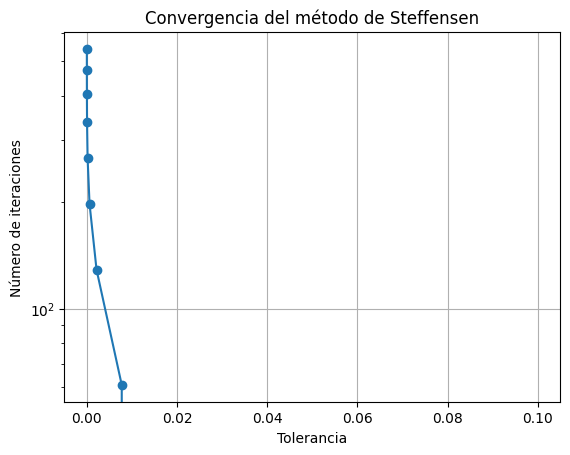

In [ ]:
# Vector de tolerancias en escala logarítmica
tolerancias = np.logspace(-1, -6, 10)  # de 1e-1 a 1e-10
iteraciones = []

# Aplicar Steffensen para cada tolerancia
for i in tolerancias:
    print(f"Probando con tolerancia: {i}")
    raiz, n = steffensen(fx,0.8,tolerancia=i,n=100)
    iteraciones.append(n)

plt.semilogy(tolerancias, iteraciones, marker='o')
plt.xlabel('Tolerancia')
plt.ylabel('Número de iteraciones')
plt.title('Convergencia del método de Steffensen')
plt.grid()
plt.show()

#2

**(60 puntos)** El periodo de oscilación $T$ de un péndulo simple con amplitud angular $\theta_0$ está dado por la integral elíptica:

$$T = 4\sqrt{\frac{L}{g}}\int_0^{\theta_0/2} \frac{d\theta}{\sqrt{\cos\theta - \cos\theta_0}}$$

Esta expresión puede representarse mediante la siguiente serie infinita:

$$T = 2\pi\sqrt{\frac{L}{g}}\left[1 + \sum_{n=1}^{\infty}c_n\sin^{2n}\left(\frac{\theta_0}{2}\right)\right]$$

donde los coeficientes $c_n$ están dados por:

$$c_n = \left(\frac{(2n-1)!!}{2^n n!}\right)^2$$

El doble factorial $(2n-1)!!$ significa el producto de todos los números impares desde 1 hasta $(2n-1)$.

Los primeros términos de esta serie son:

$$T \approx 2\pi\sqrt{\frac{L}{g}}\left[1 + \frac{1}{4}\sin^2\left(\frac{\theta_0}{2}\right) + \frac{9}{64}\sin^4\left(\frac{\theta_0}{2}\right) + \frac{25}{256}\sin^6\left(\frac{\theta_0}{2}\right) + \frac{1225}{16384}\sin^8\left(\frac{\theta_0}{2}\right) + \ldots\right]$$

Para un péndulo de longitud $L = 1.2$ metros:

## Parte A

* Realice una función llamada `doble_factorial` que calcule $(2n - 1)!!$ y luego una llamada `coeficiente_cn` que devuelva el coeficiente $c_n$

* Para una amplitud de $\theta_0 = 90°$ y $\theta_0 = 15°$, determine el valor de $T$ utilizando:
  - La aproximación de pequeñas oscilaciones $T_0 = 2\pi\sqrt{L/g}$
  - La serie truncada a 3 términos.
  - ¿Cuál será el error de las aproximaciones anteriores si toma 10 terminos como el valor exacto? ¿Cómo influye el valor del ángulo usado?

## Parte B

* Encuentre una función $f(\theta_0)$ para  $\theta_0$ (en radianes) en la cual el periodo real es exactamente un 10% mayor que el periodo para oscilaciones infinitesimales ($T_0 = 2\pi\sqrt{L/g}$). Utilice para $T(\theta_0)$ los primeros 4 términos de la serie y grafique esta función para $\theta_0 \in [0, \pi/2]$.

* Resuelva numéricamente la ecuación para $f(\theta_0) = 0$ utilizando el método de Bisección y Newton-Raphson (sin incluir la derivada).





In [ ]:
def doble_factorial(n):         #Defino la funcion doble factorial
  if n <=0:
    return 1
  else:
    resultado = 1
    for i in range(1,n+1,2):
      resultado *= i
    return resultado

def calcular_cn(n):             #Defino los coeficientes cn
  #if n <= 0:
  return (doble_factorial(2*n - 1) / (2**n * factorial(n)))**2
L=1.2
g=9.8
def periodo_pendulo(thetas, N):   #Defino ahora si la funcion del periodo del pendulo
    T0 = 2 * np.pi * np.sqrt(L / g)
    suma = 1
    for n in range(1, N + 1):
        suma += calcular_cn(n) * np.sin(thetas / 2)**(2 * n)
    return  T0 * suma

T0 = 2 * np.pi * np.sqrt(L / g)     #Defino T0
                                                          #Hallo los periodos para 3 y 10 iteraciones y paso de grados a radianes
periodopara90_3 = periodo_pendulo(np.deg2rad(90), 3)
periodopara15_3 = periodo_pendulo(np.deg2rad(15), 3)

periodopara90_10 = periodo_pendulo(np.deg2rad(90), 10)
periodopara15_10 = periodo_pendulo(np.deg2rad(15), 10)
                                                            #Defino el error porcentual
def error_porcentual(valor_real, valor_aproximado):
  error = (abs(valor_real-valor_aproximado)/valor_real)*100
  return error

error90 = error_porcentual(periodopara90_10,periodopara90_3)
error15 = error_porcentual(periodopara15_10,periodopara15_3)

print(f'el valor para 90 grados es {periodopara90_3} con un error de {error90: .4f} %')
print(f'el valor para 15 grados es {periodopara15_3} con un error de {error15: .4f} %')

print("y usando la aprox de pequeñas oscilaciones es:", T0)

el valor para 90 grados es 2.5776245610089026 con un error de  0.6737 %
el valor para 15 grados es 2.208112335528021 con un error de  0.0000 %
y usando la aprox de pequeñas oscilaciones es: 2.1986568517060525


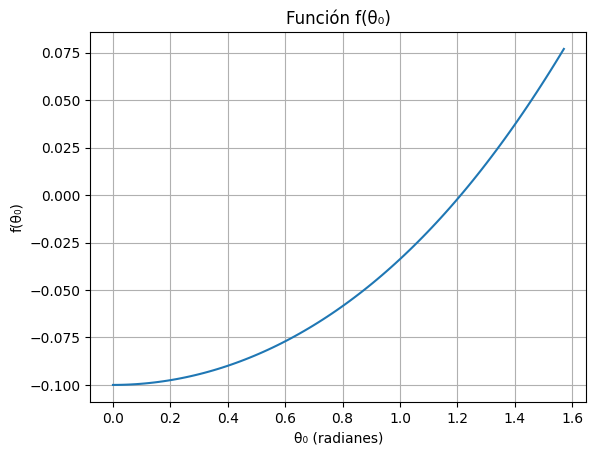

In [ ]:
def f(θ0):
  serie = 1                                         #La serie empieza en 1 y termina en 4 pero la iteracion va hasta N+1
  N = 4
  for n in range(1, N + 1):
        serie += calcular_cn(n) * np.sin(θ0 / 2)**(2 * n)
  return serie - 1.10                               #Me deveulve la serie - 10%


theta0 = np.linspace(0, np.pi/2, 100)
ftheta0 = f(theta0)

plt.figure()
plt.plot(theta0, ftheta0)
plt.xlabel('θ₀ (radianes)')
plt.ylabel('f(θ₀)')
plt.title('Función f(θ₀)')
plt.grid(True)
plt.show()

In [ ]:
raizbiseccion = bisect(f, 0, np.pi/2)
print(f"Raíz usando el método de bisección: {raizbiseccion}")

raizsecante = newton(f,0.8)
print(f"Raíz usando el método de la secante: {raizsecante}")

Raíz usando el método de bisección: 1.211605418013216
Raíz usando el método de la secante: 1.2116054180132407
